In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Lo primero que debemos hacer es cargar la base de datos a usar:

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bases de Datos/Clasificación de clientes de banco - Train.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


[Text(0, 0.5, 'Edad del Cliente'),
 Text(0.5, 0, 'Duración del ultimo contacto con el cliente'),
 Text(0.5, 1.0, 'Relacion entre la edad de los clientes y el último contacto: Suscripcion a un prestamo a largo plazo')]

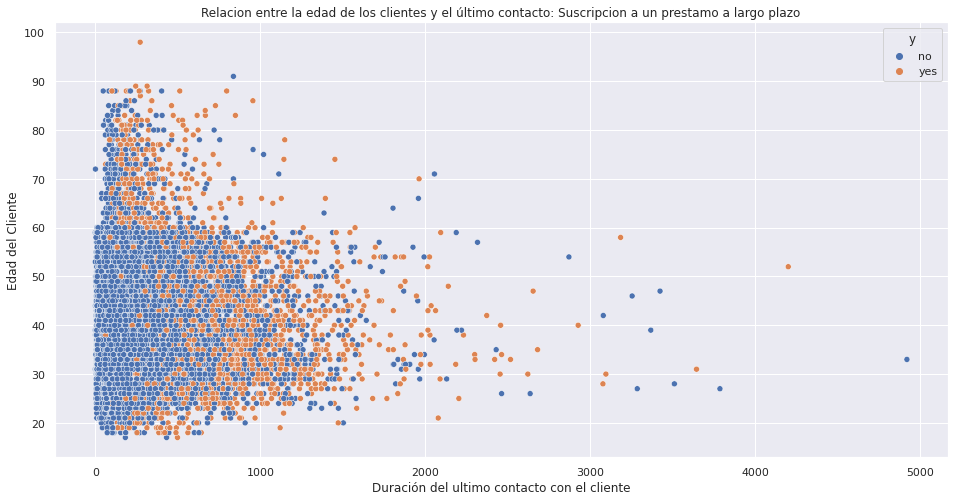

In [ ]:
#Vamos a graficar el analisis multivariado hecho con la base de datos:

#Edad del cliente, Duración del último contacto con el empleado bancario y Plazo Fijo.

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
trabajo_prestamo_civil = sns.scatterplot(data=df, x=df["duration"], y=df["age"], hue=df["y"])
ax.set(xlabel = "Duración del ultimo contacto con el cliente", ylabel = "Edad del Cliente", \
       title = "Relacion entre la edad de los clientes y el último contacto: Suscripcion a un depósito a largo plazo")

En el grafico se observa que hay una mayor cantidad de clientes jovenes y de edad media, entre los cuales se observa que mientras más largo fue el último contacto del empleado con el cliente mayor fue la tasa de personas que sacaron definieron un Plazo Fijo a largo plazo. Por otro lado, se observa que aunque la cantidad de clientes de edad avanzada es mucho menor, una gran cantidad hicieron depósitos a largo plazo aún cuando la longitud del último contacto en general haya sido mucho más corto.

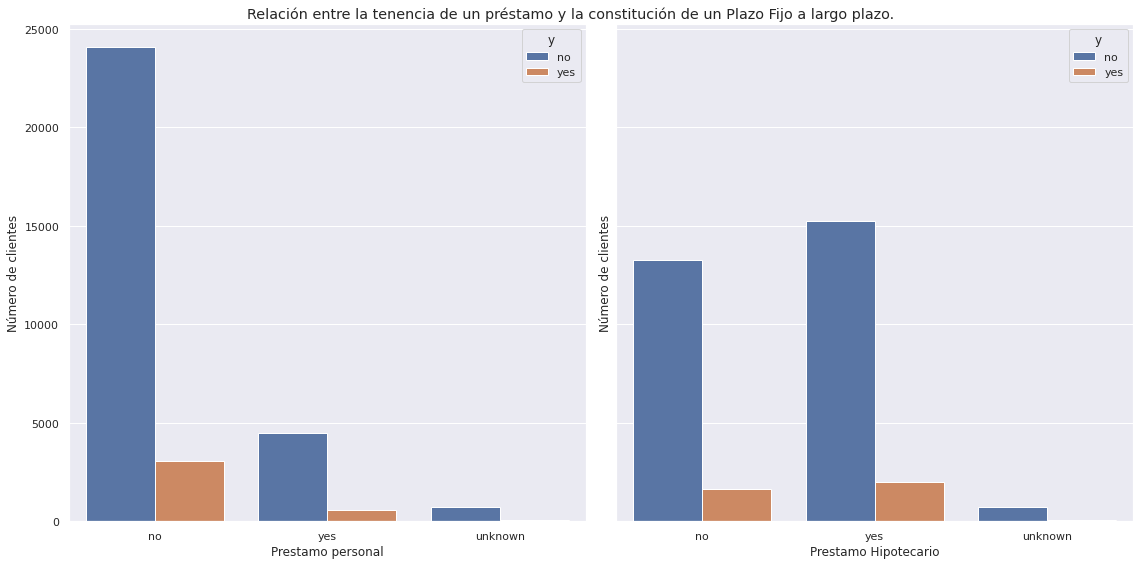

In [ ]:
#Duración del último contactos, préstamos personales y éxito de la última campaña:

sns.set()
fig, ax = plt.subplots(ncols = 2, figsize=(16,8), sharey=True)
edad_personal = sns.countplot(data=df, x=df["loan"], hue=df["y"], ax=ax[0])
edad_hipot = sns.countplot(data=df, x=df["housing"], hue=df["y"], ax=ax[1])

ax[0].set(xlabel = "Prestamo personal", ylabel = "Número de clientes")
ax[1].set(xlabel = "Prestamo Hipotecario", ylabel = "Número de clientes")

#Facilitamos la visualización:
fig.tight_layout()
plt.suptitle("Relación entre la tenencia de un préstamo y la constitución de un Plazo Fijo a largo plazo.")
fig.subplots_adjust(top=0.95)


En este gráfico nos propusimos ver si la tenencia de algun tipo de prestamo puede relacionarse con la constitución de un depósito a largo plazo. 

Se aprecian dos distribuciones diferentes: en el caso de los individuos con prestamos personales la proporción que realiza un depósito a largo plazo es sustancialmente menor, algo razonable considerando que estos prestamos suelen pedirse por una necesidad más inmediata de dinero y ser devueltos a corto-mediano plazo. Por otro lado, en el caso de los clientes con y sin prestamos hipotecarios la cantidad de individuos que establecen plazos fijos a largo plazo es mucho más similar: eso bien puede ser debido a que los creditos hipotecarios estan pensados para devolverse de forma regular y a un plazo mucho más largo, por lo que no refieren a una necesidad inmediata de dinero por parte del cliente sino a un proyecto a largo plazo.

Podemos usar esta información para focalizar las campañas de márketing en personas sin préstamos personales, o para ofrecer promociones de interes para personas con prestamos hipotecarios.

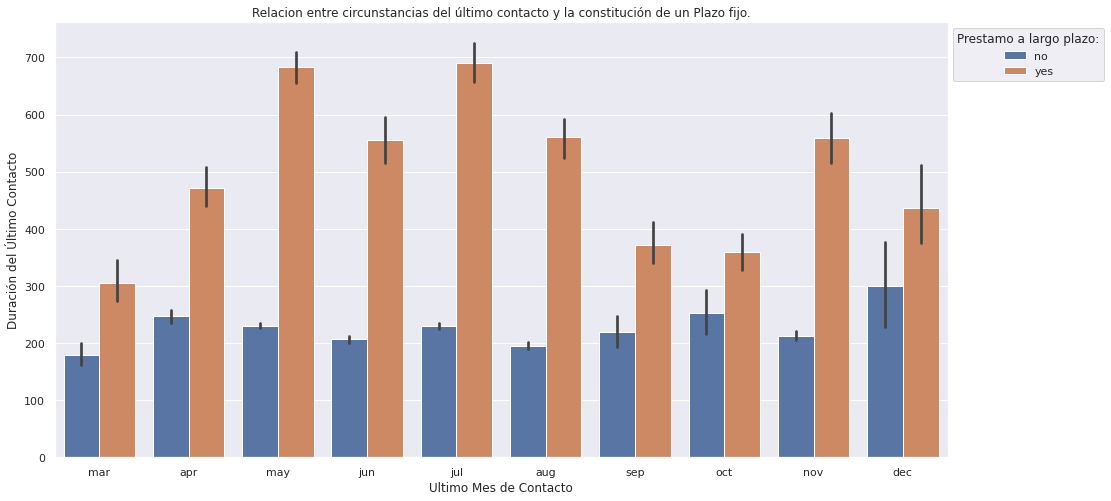

In [ ]:
#Relacion entre el tipo de trabajo, la tenencia de un Prestamo Hipotecario y la constitución de un Depósito a largo plazo:
orden=["mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

sns.set()
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(data=df, x="month", order=orden, y="duration", hue="y")
ax.set(xlabel = "Ultimo Mes de Contacto", ylabel = "Duración del Último Contacto", title = "Relacion entre circunstancias del último contacto y la constitución de un Plazo fijo.")
plt.legend(title="Depósito a largo plazo:", loc=2, bbox_to_anchor = (1,1))

En este caso analizamos la longitud media del último contacto entre empleado y cliente segun el mes en que se realizó, y analizamos si presenta alguna relacion con la suscripcion a un plazo fijo o depósito a largo plazo. 
Nuevamente se presenta que en los casos donde se logró que el cliente hiciera un depósito a largo plazo tambien se dio que la longitud del último contacto con el cliente fue sustancialmente más largo, sin embargo, en los meses de Marzo, Septiembre y Octubre la duración en los casos "positivos" fue sustancialmente más corta.

[Text(0, 0.5, 'Edad del Cliente'),
 Text(0.5, 0, 'Duración del ultimo contacto con el cliente'),
 Text(0.5, 1.0, 'Relacion entre la edad de los clientes y el último contacto: Suscripcion a un prestamo a largo plazo')]

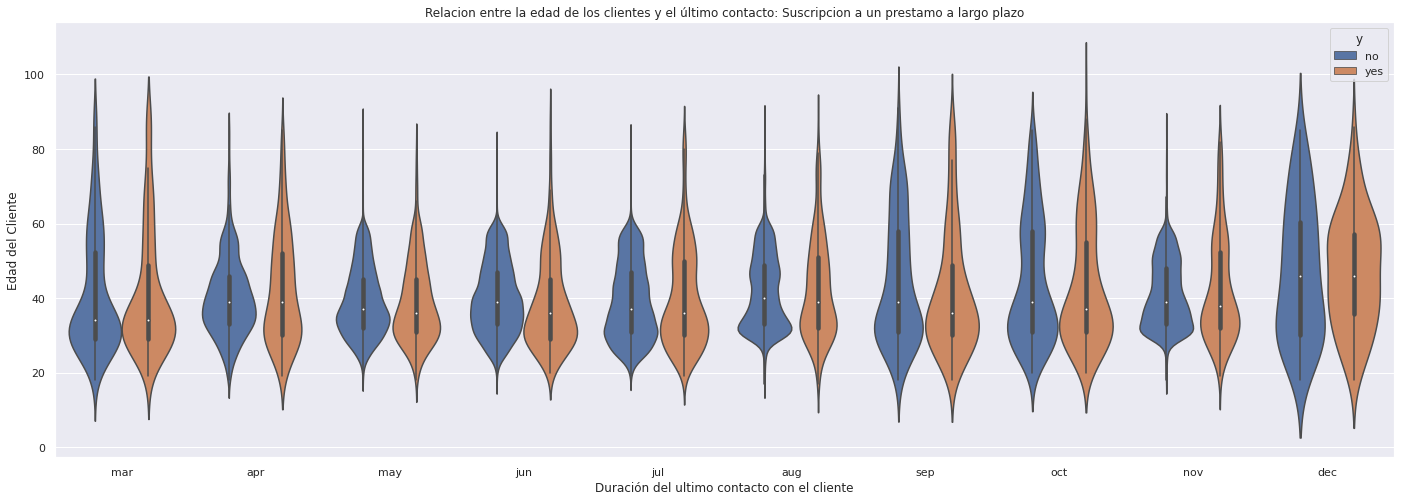

In [ ]:
#Relación entre la edad de los clientes, el último mes de contacto y la acreditación de un depósito a largo plazo:

sns.set()
fig, ax = plt.subplots(figsize=(24,8))
trabajo_prestamo_civil = sns.violinplot(data=df, x=df["month"], y=df["age"], hue=df["y"], order=orden)
ax.set(xlabel = "Último mes de contacto", ylabel = "Edad del Cliente", title = "Relacion entre la edad de los clientes y el último contacto: Suscripcion a un Plazo fijo a largo plazo")

Este gráfico complementa el gráfico de barras anterior. En este caso se muestra la distribución de las edades de los clientes que hicieron o no un depósito a largo plazo segun el último mes de contacto.

En el primer gráfico habiamos visto que entre los clientes sobre 60 años se observaba una mayor proporción de resultados positivos que para menores de 60, aun cuando la duración del último contacto fuera sustancialmente menor. En el tercer gráfico pudimos observar que en los meses de Marzo, Septiembre y Octubre la longitud de las llamadas que corresponden al último contacto disminuyen, por lo que podria haber una relación entre ambos resultados. 

Para analizar esta hipotesis hicimos el cuarto gráfico: este nos indica la distribución de las edades de los clientes segun el último mes de contacto. Lo que podemos ver es que en los meses de Marzo, Septiembre y Octubre el grafico de violin indica que hubo una mayor cantidad de clientes de más de 60 años a comparación del resto de los meses. A pesar de que es dificil saber el por qué de este comportamiento, puede ser usado como una posible estrategia de marketing si el comportamiento se mantiene.

In [ ]:
#Adjunto una pequeña tabla que nos permite ver la relación entre el número de clientes que hicieron un depósito a largo plazo y los que no según el mes.

yes = df[df["y"] == "yes"][["month","y"]].groupby("month").count()
no = df[df["y"] == "no"][["month","y"]].groupby("month").count()

yes.rename(columns = {'y':'yes'}, inplace = True)
no.rename(columns = {'y':'no'}, inplace = True)

dt = pd.concat([yes, no], axis=1)
dt

,yes,no
month,,
apr,427,1658
aug,531,4417
dec,72,71
jul,532,5231
jun,441,3806
mar,217,219
may,699,10312
nov,332,2934
oct,254,333
